Ordinary Differential Equations - ODE
====================
or 'How to Model the Zombie Apocalypse'
---------------------------------------------
Jens Hahn - 01/12/2015

Content taken from:      
**Scipy Docs** at http://scipy-cookbook.readthedocs.org/items/Zombie_Apocalypse_ODEINT.html      
Munz *et al.* (2009): http://mysite.science.uottawa.ca/rsmith43/Zombies.pdf

Introduction
=======
What is an ODE
----------------
Differential equations can be used to describe the time-dependent behaviour of a variable.      
$$\frac{\text{d}\vec{x}}{\text{d}t} = \vec{f}(\vec{x}, t)$$   
In our case the variable stands for the number of humans in a infected (zombies) or not infected population.
Of course they can also be used to describe the change of concentrations in a cell or other continuous or quasi-continuous quantity.     

In general, a first order ODE has two parts, the increasing (birth, formation,...) and the decreasing (death, degradation, ...) part:

$$\frac{\text{d}\vec{x}}{\text{d}t} = \sum_{}\text{Rates}_{\text{production}} - \sum_{}\text{Rates}_{\text{loss}}$$ 


You probably already know ways to solve a differential equation algebraically by 'separation of variables' (Trennung der Variablen) in the homogeneous case or 'variation of parameters' (Variation der Konstanten) in the inhomogeneous case. Here, we want to discuss the use of numerical methods to solve your ODE system.

Solve the model
==========
The zombie apokalypse model
-------------------------
Let's have a look at our equations:

Number of susceptible victims $S$:
$$\frac{\text{d}S}{\text{d}t} = \text{???}$$

Number of zombies $Z$:
$$\frac{\text{d}Z}{\text{d}t} = \text{???}$$

Number of people "killed" $R$:
$$\frac{\text{d}R}{\text{d}t} = \text{???}$$

Parameters:     
P: the population birth rate      
d: the chance of a natural death      
B: the chance the “zombie disease” is transmitted (an alive person becomes a zombie)      
G: the chance a dead person is resurrected into a zombie      
A: the chance a zombie is totally destroyed by a human      

Let's start
------------
Before we start the simulation of our model, we have to define our system.     
We start with our static information:
1. Initial conditions for our variables
2. Values of the paramters
3. Simulation time 
4. Number of time points at which we want to have the values for our variables (the time grid). *Use numpy!!*

In [32]:
import numpy as np
# 1. initial conditions
            # initial population
pop= 300
            # initial zombie population
zpop=0
            # initial death population
dpop=0
            # initial condition vector
vpop=np.array([pop,zpop,dpop])

# 2. parameter values
            # birth rate
br= 0.00003
            # 'natural' death percent (per day)
nd=0.032
            # transmission percent  (per day)
bite=10
            # resurect percent (per day)
resc=1009
            # destroy percent  (per day)
dest= 0.00005

# 3. simulation time
            # start time in days
start=0
            # end time in days
stop=1
            # time grid, 1000 steps or data points (NUMPY!!!)
t=np.linspace(start,stop,1000)

In the second step, we write a small function **f**, that receives a list of the current values of our variables **x** and the current time **t**. The function has to evaluate the equations of our system or $\frac{\text{d}\vec{x}}{\text{d}t}$, respectively. Afterwards, it returns the values of the equations as another list.     
**Important**   
*Since this function **f** is used by the solver, we are not allowed to change the input (arguments) or output (return value) of this function.*

In [3]:
# function 'f' or 'dxdt' to evaluate the changes of the system dy/dt = f(y, t)
def f(x,t):
    dpop=br*vpop[0]-nd*vpop[0]-bite*vpop[0]*vpop[1]
    dzpop=bite*vpop[0]*vpop[1]+resc*vpop[2]-dest*vpop[0]*vpop[1]
    ddpop=nd*vpop[0]-resc*vpop[2]
    dvpop=np.array([dpop,dzpop,ddpop])
    return(dvpop)

Last but not least, we need to import and call our solver. The result will be a matrix with our time courses as columns and the values at the specified time points. Since we have a values for every time point and every species, we can directly plot the results using *matplotlib*. 

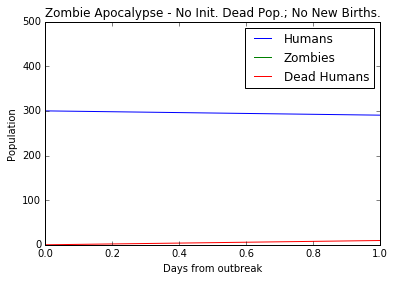

In [33]:
# zombie apocalypse modeling
import matplotlib.pyplot as plt  # for plotting
# plots inside the notebook
%matplotlib inline  
from scipy.integrate import odeint  # the integrator

# solve the DEs
result = odeint(f, vpop, t)
S = result[:, 0]
Z = result[:, 1]
R = result[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Humans')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Dead Humans')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.ylim([0,500])
plt.legend(loc=0)

Literature:
=======
1. L. Grüne & O. Junge - **Gewöhnliche Differentialgleichungen** - Vieweg+Teubner - 2009
2. E. Hairer *et al.* - **Solving Ordinary Differential Equations I** - Springer - 2008
3. E. Klipp *et al.* - **Systems Biology**: A Textbook - Wiley-Blackwell - 2009
4. B. Ingalls - **Mathematical Modeling in Systems Biology**: An Introduction - MIT Press - 2013
4. M. Covert - **Fundamentals of Systems Biology** - CRC Press - 2015
6. H. Sauro - **Systems Biology**: Introduction to Pathway Modeling - Ambrosius Publishing - 2014

